## categorical feature

In [ ]:
import os
import pandas as pd
data = pd.read_csv('./data/adult.data', header=None, index_col=False,
                  names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
data.head()

In [3]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [4]:
data.columns

Index(['age', 'workclass', 'education', 'gender', 'hours-per-week',
       'occupation', 'income'],
      dtype='object')

In [5]:
data_dummies = pd.get_dummies(data)
data_dummies.columns

Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
   

In [6]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
X.shape, y.shape

((32561, 44), (32561,))

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.8094828645129591

In [11]:
demo_df = pd.DataFrame({'숫자형 특성': [0, 1, 2, 1],
                       '범주형 특성': ['양말', '여우', '양말', '상자']})
demo_df

,숫자형 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [12]:
pd.get_dummies(demo_df, columns=['숫자형 특성', '범주형 특성'])

,숫자형 특성_0,숫자형 특성_1,숫자형 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(demo_df)

array([[1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [15]:
ohe.get_feature_names()

array(['x0_0', 'x0_1', 'x0_2', 'x1_상자', 'x1_양말', 'x1_여우'], dtype=object)

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
    ("scaling", StandardScaler(), ['age', 'hours-per-week']),
    ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])
])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data_features = data.drop("income", axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

X_train_trans = ct.fit_transform(X_train)
X_train.shape

(24420, 6)

In [18]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
logreg.score(X_test_trans, y_test)

0.808991524382754

In [20]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

In [21]:
ct.named_transformers_.scaling

StandardScaler()

In [22]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']), 
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))

## 구간분할, 이산화 & 선형모델, 트리모델

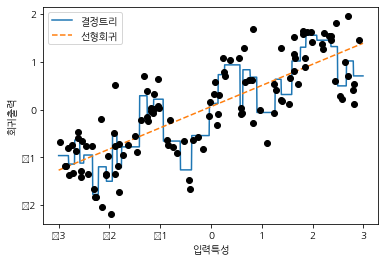

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] = "NanumGothic"

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label='결정트리')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label='선형회귀')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('회귀출력')
plt.xlabel('입력특성')
plt.legend(loc='best')
plt.show()

In [35]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
kb.bin_edges_

array([array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
              -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
               2.92132162])                                                   ],
      dtype=object)

In [37]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [38]:
X[:10]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547]])

In [39]:
X_binned.toarray()[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [40]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

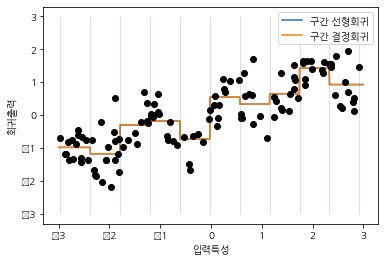

In [48]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("회귀출력")
plt.xlabel("입력특성")
plt.show()